In [1]:
!pip install nltk


In [2]:
##### zrobione lepiej
import pandas as pd
import numpy as np
import re
import nltk.corpus
from sklearn.model_selection import train_test_split
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
stemmer = PorterStemmer()
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import yaml
import pandas as pd
import re
import nltk.corpus
import pickle
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import spacy
from spacy.tokens import Token
from spacy.matcher import Matcher
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
spacy.prefer_gpu()
nlp.add_pipe("spacytextblob")
#####klasyczny remove_stopwords 
def remove_stopwords(description):
    words = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", description)
    words = nltk.word_tokenize(words)
    stemmed_words = [stemmer.stem(word) for word in words]
    filtered_words = [word for word in stemmed_words if word.lower() not in stopwords]
    rev =  ' '.join(filtered_words)
    return rev
#spacysentiment
def remove_stopwords_spacy(description):
    filtered_reviews = [] 
    doc = nlp(description)    
    filtered_text = ' '.join(token.text for token in doc if token._.blob.sentiment_assessments.assessments)
    return filtered_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MDY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_json("Luxury_Beauty_5.json", lines=True)
df=df.head(1000)

In [4]:
df_notclean = pd.read_json("Luxury_Beauty_5.json", lines=True)

In [5]:
# Lekki preproc
df['overall'] = df['overall'].replace({1: 0, 2: 0, 3: 1, 4: 2, 5: 2})
df['verified'] = df['verified'].replace({True: 1,False: 0})
df["ReviewTextLen"] = df["reviewText"].astype(str).fillna('').apply(len)
df = df.drop(columns= ['image', 'vote', 'style'])
df['summary'] = df['summary'].fillna(value=df['reviewText'])
df['reviewText'] = df['reviewText'].fillna(value=df['summary'])
df = df.drop(['reviewTime', 'reviewerID', 'asin', 'reviewerName'], axis=1)
###
df['reviewText'] = df['reviewText'].astype(str).str.lower()
df['summary'] = df['summary'].astype(str).str.lower()

####remove stopwords też lekkie
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

df['reviewText'] = df['reviewText'].apply(remove_stopwords)
df['summary'] = df['summary'].apply(remove_stopwords)


df=df.head(1000)
print("doine")
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


doine


,overall,verified,reviewText,summary,unixReviewTime,ReviewTextLen
0,2,1,thi handcream ha beauti fragranc doesnt stay p...,beauti fragranc,1515110400,125
1,2,1,wonder hand lotion serious dri skin stay long ...,wonder hand lotion,1491350400,187
2,2,1,best hand cream around silki thick soak way le...,best hand cream around,1490572800,85
3,2,1,thank,five star,1489968000,8
4,2,1,great hand lotion soak right leav skin super s...,great hand lotion,1488240000,95
...,...,...,...,...,...,...
995,2,0,la rocheposay thermal spring water feel good l...,feel luxuri,1448323200,428
996,1,0,normal facial skincar routin current oper bosc...,sure thi accomplish stick boscia,1447286400,584
997,2,0,water aerosol long realiz get carri happen lik...,aerosol water,1447286400,536
998,2,0,im realli impress thi product cool refresh goe...,surprisingli cool refresh,1446854400,369


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("overall", axis=1),
                                    df["overall"], stratify = df["overall"],  test_size=0.25, random_state=42)

In [7]:
X_test

,verified,reviewText,summary,unixReviewTime,ReviewTextLen
743,1,good luck apr peel balm tri thi onli use troub...,good luck apr peel balm tri thi,1405209600,142
703,1,read wonder jane iredal product sever year rad...,alway want tri,1387843200,628
606,0,love thi stuff realli doe cover imperfect perf...,dermablend professin cover creme,1497916800,1132
1,1,wonder hand lotion serious dri skin stay long ...,wonder hand lotion,1491350400,187
18,1,son favorit hand cream hi dri hand greasi abso...,favorit hand cream,1453161600,95
...,...,...,...,...,...
865,0,well like got clean citru scent rather pleas l...,calvin klein etern men,1430092800,145
790,0,thi shampoo reminisc malin goetz shampoo datah...,noth revolutionari like,1373155200,759
907,1,go wrong thi compani,great buy,1461542400,39
455,0,recent wa offer durablend cover creme blur mou...,seriou coverag,1499644800,2700


In [8]:
cols_numerical = X_train.select_dtypes(include=['int64', 'float64']).columns
cols_numerical

Index(['verified', 'unixReviewTime', 'ReviewTextLen'], dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

## zmienne ciągłe
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
## zmienne kategoryczne
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
 
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [10]:
!pip install gensim

In [11]:
from gensim.models import Word2Vec
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, max_features=100, window=5, min_count=1, workers=4):
        self.max_features = max_features
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.word2vec = None

    def fit(self, X, y = None):
        sentences = [sentence.split() for sentence in X]
        # print(sentences[:5])
        self.word2vec = Word2Vec(sentences, vector_size=self.max_features, window=self.window, 
                                 min_count=self.min_count, workers=self.workers)
        return self

    def transform(self, X, y=None):
        vectors = []
        for sentence in X:
            sentence_vector = []
            for word in sentence.split():
                if word in self.word2vec.wv.key_to_index:
                    sentence_vector.append(self.word2vec.wv[word])
            if sentence_vector:
                sentence_vector = np.mean(sentence_vector, axis=0)
                vectors.append(sentence_vector)
            else:
                vectors.append(np.zeros(self.max_features))
        return np.array(vectors)

In [12]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from tempfile import mkdtemp

review_column = ['reviewText']
#cv = CountVectorizer( max_features=50 )

review_preprocessing = Pipeline([('bow_review', TfidfVectorizer())])
summary_preprocessing = Pipeline([('bow_summary', TfidfVectorizer())])
numeric_preprocessing = Pipeline([('scaler', MinMaxScaler())])


preprocess = ColumnTransformer([
    ('review_preprocessing', review_preprocessing, 'reviewText'),
    ('summary_preprocessing', summary_preprocessing, 'summary'),
    ('numeric_preprocessing', numeric_preprocessing, ['ReviewTextLen', 'unixReviewTime'])])
    
#cachedir = mkdtemp()
pipeline = Pipeline([
                ('preprocess', preprocess),
                ('clf', RandomForestClassifier())])

#pipeline.fit(X_train, y_train)
set_config(display='diagram')


#k_folds = KFold(n_splits=5)
param_grid =[ 
    {
        #"preprocess__review_preprocessing__bow_review": [CountVectorizer(), TfidfVectorizer(),
                                                        #  Word2VecTransformer()],
        #"preprocess__summary_preprocessing__bow_summary": [CountVectorizer(), TfidfVectorizer(),
                                                         # Word2VecTransformer()],
        "preprocess__summary_preprocessing__bow_summary__max_features": [50, 100],
        "preprocess__review_preprocessing__bow_review__max_features": [50, 100]
    }]


grid_search = GridSearchCV(pipeline, param_grid, cv = 5, verbose=1, n_jobs=-1, 
                           scoring = 'f1_macro')
randomized_search = RandomizedSearchCV(pipeline, param_grid, cv = 5, verbose=1, n_jobs=-1, 
                           scoring = 'f1_macro')
halvingrandom_search = HalvingRandomSearchCV(pipeline, param_grid, cv = 5, verbose=1, n_jobs=-1, 
                           scoring = 'f1_macro')
halvinggrid_search = HalvingGridSearchCV(pipeline, param_grid, cv = 5, verbose=1, n_jobs=-1, 
                           scoring = 'f1_macro')




In [13]:
#####grid 
print("start :( ")
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time 
print(total_time)
print("grid done \n")


start :( 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
4.523417234420776
grid done 



In [14]:
##randomized_search
start_time = time.time()
randomized_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time 
print(total_time)
print("randomized done \n")


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\MDY\anaconda3\envs\pdiow\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


1.5185506343841553
randomized done 



In [15]:
###havlingrandom
start_time = time.time()
halvingrandom_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time 
print(total_time)
print("halving done- jeszcze troche nie poddawaj sie\n")

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 3
min_resources_: 30
max_resources_: 750
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 30
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\MDY\anaconda3\envs\pdiow\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=25. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 2
n_resources: 90
Fitting 5 folds for each of 2 candidates, totalling 10 fits
1.7352402210235596
halving done- jeszcze troche nie poddawaj sie



In [16]:
###halvinggrid
start_time = time.time()
halvinggrid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time 
print(total_time)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 250
max_resources_: 750
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 250
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 1
n_candidates: 2
n_resources: 750
Fitting 5 folds for each of 2 candidates, totalling 10 fits
1.670445203781128


In [17]:
print(grid_search.best_params_)
grid_search.best_score_
#grid_search.cv_results_
#grid_search.cv_results_
print(randomized_search.best_params_)
print(halvingrandom_search.best_params_)
print(halvinggrid_search.best_params_)

{'preprocess__review_preprocessing__bow_review__max_features': 50, 'preprocess__summary_preprocessing__bow_summary__max_features': 100}
{'preprocess__summary_preprocessing__bow_summary__max_features': 50, 'preprocess__review_preprocessing__bow_review__max_features': 50}
{'preprocess__summary_preprocessing__bow_summary__max_features': 50, 'preprocess__review_preprocessing__bow_review__max_features': 100}
{'preprocess__review_preprocessing__bow_review__max_features': 50, 'preprocess__summary_preprocessing__bow_summary__max_features': 50}


In [18]:
#print(halvingrandom_search.cv_results_)

In [19]:
#print(classification_report(y_test, grid_search.predict(X_test)))
from sklearn.metrics import f1_score
print("Gridsearch")
print(f1_score(y_test, grid_search.predict(X_test), average='macro'))
print("Randomized")
print(f1_score(y_test, randomized_search.predict(X_test), average='macro'))
print("halvingrandom")
print(f1_score(y_test, halvingrandom_search.predict(X_test), average='macro'))
print("halvinggrid")
print(f1_score(y_test, halvinggrid_search.predict(X_test), average='macro'))

Gridsearch
0.48127299484915387
Randomized
0.43956043956043955
halvingrandom
0.44188344424279097
halvinggrid
0.43956043956043955


In [20]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('review_preprocessing',
                                                                         Pipeline(steps=[('bow_review',
                                                                                          TfidfVectorizer())]),
                                                                         'reviewText'),
                                                                        ('summary_preprocessing',
                                                                         Pipeline(steps=[('bow_summary',
                                                                                          TfidfVectorizer())]),
                                                                         'summary'),
                                                                        ('numeric_preprocessing',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['ReviewTextLen',
                                                                          'unixReviewTime'])])),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'preprocess__review_preprocessing__bow_review__max_features': [50,
                                                                                         100],
                          'preprocess__summary_preprocessing__bow_summary__max_features': [50,
                                                                                           100]}],
             scoring='f1_macro', verbose=1)

In [21]:
!pip install spacy

In [22]:
!python -m spacy download en_core_web_sm
!pip install spacytextblob

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.6 MB/s eta 0:00:08
      --------------------------------------- 0.3/12.8 MB 3.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/12.8 MB 6.0 MB/s eta 0:00:03
     -------- ------------------------------- 2.8/12.8 MB 14.6 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 19.7 MB/s eta 0:00:01
     -------------------- ------------------- 6.4/12.8 MB 22.8 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 25.4 MB/s eta 0:00:01
     ------------------------------ -------- 10.2/12.8 MB 27.1 MB/s eta 0:00:01
     ------------------------------------ -- 12.0/12.8 MB 38.6 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 38.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 31.2 MB/s eta 0:00:00
[+] Download and installation successful
You can no

In [23]:
import spacy
from spacy.tokens import Token
from spacy.matcher import Matcher
from spacytextblob.spacytextblob import SpacyTextBlob
# Załaduj model językowy Spacy


In [91]:
#print(X_train)
X_train_new = X_train
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
scaler = StandardScaler()
X_train_new['ReviewTextLen'] = scaler.fit_transform(X_train_new[['ReviewTextLen']]).flatten()
X_train_new['unixReviewTime'] = scaler.fit_transform(X_train_new[['unixReviewTime']]).flatten()
X_train_new

cv_rev = CountVectorizer(max_features = 50) #to take max features(columns), 2500
bow_review = cv_rev.fit_transform(X_train_new['reviewText']).toarray()

df_bow = pd.DataFrame(bow_review, columns = cv_rev.get_feature_names(), index = X_train_new.index) 

cv_sum = CountVectorizer(max_features = 50)
bow_summary = cv_sum.fit_transform(X_train_new['summary']).toarray()
df_bow2 = pd.DataFrame(bow_summary, columns = cv_sum.get_feature_names(), index = X_train_new.index) 

X_train_new = pd.concat([df_bow,df_bow2], axis = 1)
#print(X_train_new)
#X_train_new =  X_train_new.drop(['reviewText','summary'])
#X_train_new = X_train_new.drop(['reviewText','summary'], axis=1)
X_train_new
#print(X_train_new)


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


,also,appli,becaus,bit,blend,color,cover,coverag,day,dermablend,...,shade,skin,star,stuff,thi,use,veri,wa,well,work
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
120,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
370,0,2,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
146,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385,0,2,0,0,0,2,2,0,2,4,...,0,0,0,0,0,0,0,0,0,0


In [77]:

clf = svm.SVC()
rf = RandomForestClassifier()
rf.fit(X_train_new, y_train)
# import sklearn
# model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
# model.fit(X_train_new, y_train)

#shap.initjs()  # Inicjalizacja obsługi wizualizacji opartych na JavaScript w notebooku
#explainer = shap.TreeExplainer(rf)  # Inicjalizacja modułu dla konkretnego modelu
#shap_values = explainer(X_train_new)# Obliczenie wartości shap
#shap.plots.force(shap_values[0])

RandomForestClassifier()

In [85]:
#shap.force_plot(explainer.expected_value[0], shap_values.values[0])
#shap.summary_plot(shap_values.values[0], plot_type='bar')
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train_new, y_train)

#shap.initjs()
explainer = shap.Explainer(rf, X_train_new, feature_names=cv_rev.get_feature_names())
shap_values = explainer(X_train_new, check_additivity=False)


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
 96%|=================== | 2165/2250 [00:24<00:00]       

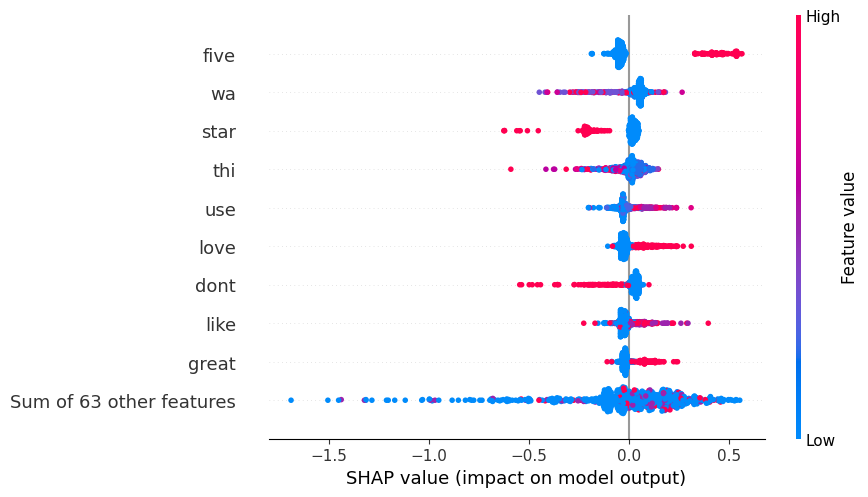

In [99]:
X_train_new = X_train_new.loc[:,~X_train_new.columns.duplicated()]
model = xgboost.XGBRegressor().fit(X_train_new, y_train)

explainer = shap.Explainer(model)
shap_values = explainer(X_train_new)
shap_obj = explainer(X_train_new)
shap.plots.beeswarm(shap_obj)
shap.plots.force(shap_values[0])

In [86]:
shap.plots.beeswarm(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [24]:
import xgboost
import shap

# X_encoded = halvingrandom_search.best_estimator_['preprocess'].fit_transform(X_train)
# X_encoded = np.asarray(X_encoded, dtype=np.float32)
# # fit the model 
# best_model = halvingrandom_search.best_estimator_['clf'].fit(X_encoded, y_train)



# calculate the Shap values
#shap_values = shap.TreeExplainer(best_model).shap_values(X_encoded)

# plot the Shap values
shap.summary_plot(shap_values, X_encoded, plot_type='bar')

C:\Users\MDY\anaconda3\envs\pdiow\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


ValueError: setting an array element with a sequence.